In [30]:
import pandas as pd
from pandas import option_context
import glob
import sys
sys.path.append('E:\GitHubProjects\dissertation\Scripts')
import helperfn as hf

%load_ext autoreload
%autoreload 2

,review,score
0,"A shambles, completely unorganised and clearly more interested in making a profit than supporting students",0
1,"This school is absolute b******. I'm in the MSC computing professional placement program and paying a load of money for half ass professors, outdated material and all of my school mates are PISSED. Do not waste your time on this school. They will charge you a stupid amount of money for no education. Udemy has better courses than this s***** school. DO NOT RECOMMEND.",0
2,"As an international student, lecturers are great, online resources is there when i need them!",1
3,"I have had a terrible experience at this university and have considered quitting my post graduate several times since arriving.\nHad issues with registration and after going through 6 different members of staff one was very apologetic which I accepted and assumed they were just very busy at that time of year, the lady that was apologetic said she would E-mail me back - its 4 months later and I have still never heard back.\nI had to give the campus facilities a low rating - it is probably unfair however the only services I have tried using was email and logging into computers on campus, my email didn't work and my login didn't work either.\nHad issues with student counselling team - whenever I have been in contact they have been excellent (one of the redeeming features of the university) - however have not heard back once or twice.\nTravel, Lecturer issues, lack of help over coronavirus have made for an awful personal experience where I might quit.",0
4,"I do love my university. The staff are extremely helpful and ready to aid you. The professors always take time for their students and getting career or study advice is no issue. My postgrad might not have been as challenging as I'd hoped for, but I still feel like it was worth it. Theory was always closely linked to real life situations and we spent a lot of time analysing case studies and applying theory. I loved the structure, the facilities and the staff.",1
...,...,...
363,Fantastic environment and gorgeoud scenery. The clubs and societies provide great opportunities to meet life long friends.,1
364,The campus contains everything you could ever need in a beautiful friendly environment. The staff are always very helpful and the courses are designed to give you plenty of actual practical experience.,1
365,The campus is beautiful and it offers over 100 clubs/societies!,1
366,I'm study in the highland campus in Inverness. There is no students union or any club or societies up here. The accommodation is also not very appealing. The placements are great as you get to see rural Scotland however sometimes the university is not accommodating when you have finical issues and can't afford your 'away' placement. Overall it is a great uni with just some minor issues in the highland campus.,0


In [ ]:
pd.set_option('display.max_colwidth', -1)

df = hf.merge_datasets(r'E:\GitHubProjects\dissertation\scraper\approved_datasets')


# df.iloc[[363,367]]

In [4]:
# BALANCING THE DATASET
df.score.value_counts()


1    260
0    108
Name: score, dtype: int64

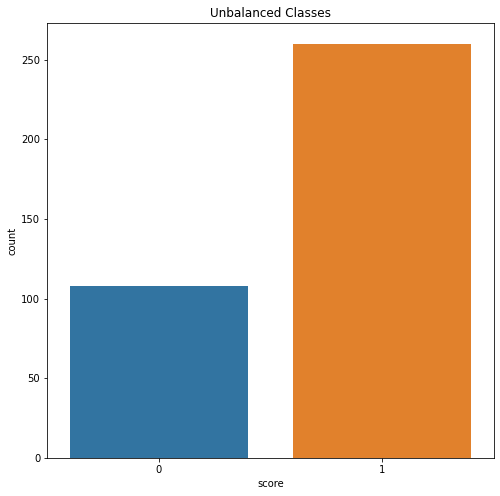

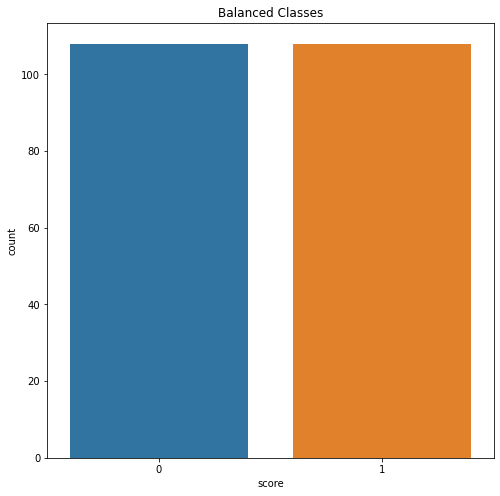

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=14)

# Put all negative reviews/class in a separate dataset.
negative_df = shuffled_df.loc[shuffled_df['score'] == 0]

#Randomly select 108 postive reviews (majority class)
positive_df = shuffled_df.loc[shuffled_df['score'] == 1].sample(n=108)

# Concatenate both dataframes again
normalized_df = pd.concat([negative_df, positive_df])


plt.figure(figsize=(8, 8))
sns.countplot('score', data=df)
plt.title('Unbalanced Classes')
plt.show()


plt.figure(figsize=(8, 8))
sns.countplot('score', data=normalized_df)
plt.title('Balanced Classes')
plt.show()


In [6]:
# TEST-SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['score'], test_size=0.33)

In [2]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
import re

#converting list to set for perofmance gains, when hcecking if word is present in stoplist
stoplist = set(stopwords.words('english'))
punctuations = {'"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'}


# tt = TweetTokenizer()
# tokenizer = RegexpTokenizer(r'[\w\'\!]+')
#TODO: dont segment Apostrophe if no space between e.g. whats'up but segment gg ' gg

#removal of puncuations
def remove_punctuations(text):
    text_nopunct = re.sub('\!\!+', '!', text)
    # text_nopunct = re.sub('['+punctuations+']', '', text)
    return text_nopunct

print(remove_punctuations("HELLO.!!!"))

#lower case tokens
def lower_token(tokens): 
    return [w.lower() for w in tokens]  

#remove stop words
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

# df['review'] = df['review'].apply(lambda x: remove_punctuations(x))
tokens = [tt.tokenize(rev) for rev in df.review]
lower_tokens = [lower_token(token) for token in tokens]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]

df['tokens'] = filtered_words


HELLO.!


NameError: name 'df' is not defined

In [19]:
df['tokens']

0      [shambles, completely, unorganised, clearly, i...
1      [school, absolute, b, im, msc, computing, prof...
2      [international, student, lecturers, great, onl...
3      [terrible, experience, university, considered,...
4      [love, university, staff, extremely, helpful, ...
                             ...                        
363    [fantastic, environment, gorgeoud, scenery, cl...
364    [campus, contains, everything, could, ever, ne...
365     [campus, beautiful, offers, 100, clubssocieties]
366    [im, study, highland, campus, inverness, stude...
367    [wifi, drops, easily, applying, accommodation,...
Name: tokens, Length: 368, dtype: object

In [1]:
string.punctuation

NameError: name 'string' is not defined